In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, KFold, GroupKFold, GridSearchCV, StratifiedKFold
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [2]:
train = pd.read_csv(r'C:\Users\BIS_COM\data\train\HR\aug_train.csv')
test = pd.read_csv(r'C:\Users\BIS_COM\data\train\HR\aug_test.csv')
train.head()

enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
2        11561   city_21                   0.624    NaN   
3        33241  city_115                   0.789    NaN   
4          666  city_162                   0.767   Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience                 NaN        Graduate   
4  Has relevent experience       no_enrollment         Masters   

  major_discipline experience company_size    company_type last_new_job  \
0             STEM        >20          NaN             NaN            1   
1             STEM         15        50-99         Pvt Ltd           >4   
2             STEM          5          NaN             NaN        never   
3  Business Degree         <1          NaN         Pvt Ltd        never   
4             STEM        >20        50-99  Funded Startup            4   

   training_hours  target  
0              36     1.0  
1              47     0.0  
2              83     0.0  
3              52     1.0  
4               8     0.0

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [4]:
train.describe(include='O')

city gender      relevent_experience enrolled_university  \
count      19158  14650                    19158               18772   
unique       123      3                        2                   3   
top     city_103   Male  Has relevent experience       no_enrollment   
freq        4355  13221                    13792               13817   

       education_level major_discipline experience company_size company_type  \
count            18698            16345      19093        13220        13018   
unique               5                6         22            8            6   
top           Graduate             STEM        >20        50-99      Pvt Ltd   
freq             11598            14492       3286         3083         9817   

       last_new_job  
count         18735  
unique            6  
top               1  
freq           8040

In [5]:
obj = [ x for x in train.columns if train[x].dtypes == 'O']
num = [ x for x in train.columns if train[x].dtypes in ['int64','float64']]
print('obj_columns : {}, \n num_columns : {}'.format(obj, num))

obj_columns : ['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job'], 
 num_columns : ['enrollee_id', 'city_development_index', 'training_hours', 'target']


# Missing Value

In [6]:
train.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [7]:
train = train.dropna(subset=['gender'])
train.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university        213
education_level            259
major_discipline          1978
experience                  16
company_size              4313
company_type              4433
last_new_job                74
training_hours               0
target                       0
dtype: int64

In [8]:
train['enrolled_university'] = train['enrolled_university'].fillna('no_enrollment')
train['education_level'] = train['education_level'].fillna('no_education')
train['major_discipline'] = train['major_discipline'].fillna('No Major')
train['experience'] = train['experience'].fillna('<1')
train['company_size'] = train['company_size'].fillna('<10')
train['company_type'] = train['company_type'].fillna('Other')
train['last_new_job'] = train['last_new_job'].fillna('never')
train.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [9]:
test.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

In [10]:
test = test.dropna(subset=['gender'])

In [11]:
test['enrolled_university'] = test['enrolled_university'].fillna('no_enrollment')
test['education_level'] = test['education_level'].fillna('no_education')
test['major_discipline'] = test['major_discipline'].fillna('No Major')
test['experience'] = test['experience'].fillna('<1')
test['company_size'] = test['company_size'].fillna('<10')
test['company_type'] = test['company_type'].fillna('Other')
test['last_new_job'] = test['last_new_job'].fillna('never')
test.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64

# Label Encoding

In [12]:
for x in obj:
    le=LabelEncoder()
    le.fit(list(train[x].astype('str')) + list(test[x].astype('str')))
    train[x] = le.transform(list(train[x].astype(str))) 
    test[x] = le.transform(list(test[x].astype(str))) 
train.head()

enrollee_id  city  city_development_index  gender  relevent_experience  \
0         8949     5                   0.920       1                    0   
1        29725    77                   0.776       1                    1   
4          666    50                   0.767       1                    0   
6        28806    49                   0.920       1                    0   
7          402    83                   0.762       1                    0   

   enrolled_university  education_level  major_discipline  experience  \
0                    2                0                 5          21   
1                    2                0                 5           6   
4                    2                2                 5          21   
6                    2                1                 3          15   
7                    2                0                 5           4   

   company_size  company_type  last_new_job  training_hours  target  
0             7             3             0              36     1.0  
1             4             5             4              47     0.0  
4             4             1             3               8     0.0  
6             4             1             0              24     0.0  
7             7             5             4              18     1.0

In [13]:
test.head()

enrollee_id  city  city_development_index  gender  relevent_experience  \
0        32403    78                   0.827       1                    0   
1         9858     5                   0.920       0                    0   
2        31806    64                   0.624       1                    1   
3        27385    26                   0.827       1                    0   
4        27724     5                   0.920       1                    0   

   enrolled_university  education_level  major_discipline  experience  \
0                    0                0                 5          19   
1                    2                0                 5          15   
2                    2                1                 3          20   
3                    2                2                 5           2   
4                    2                0                 5          21   

   company_size  company_type  last_new_job  training_hours  
0             7             3             0              21  
1             7             5             0              98  
2             7             5             5              15  
3             0             5             0              39  
4             3             5             4              72

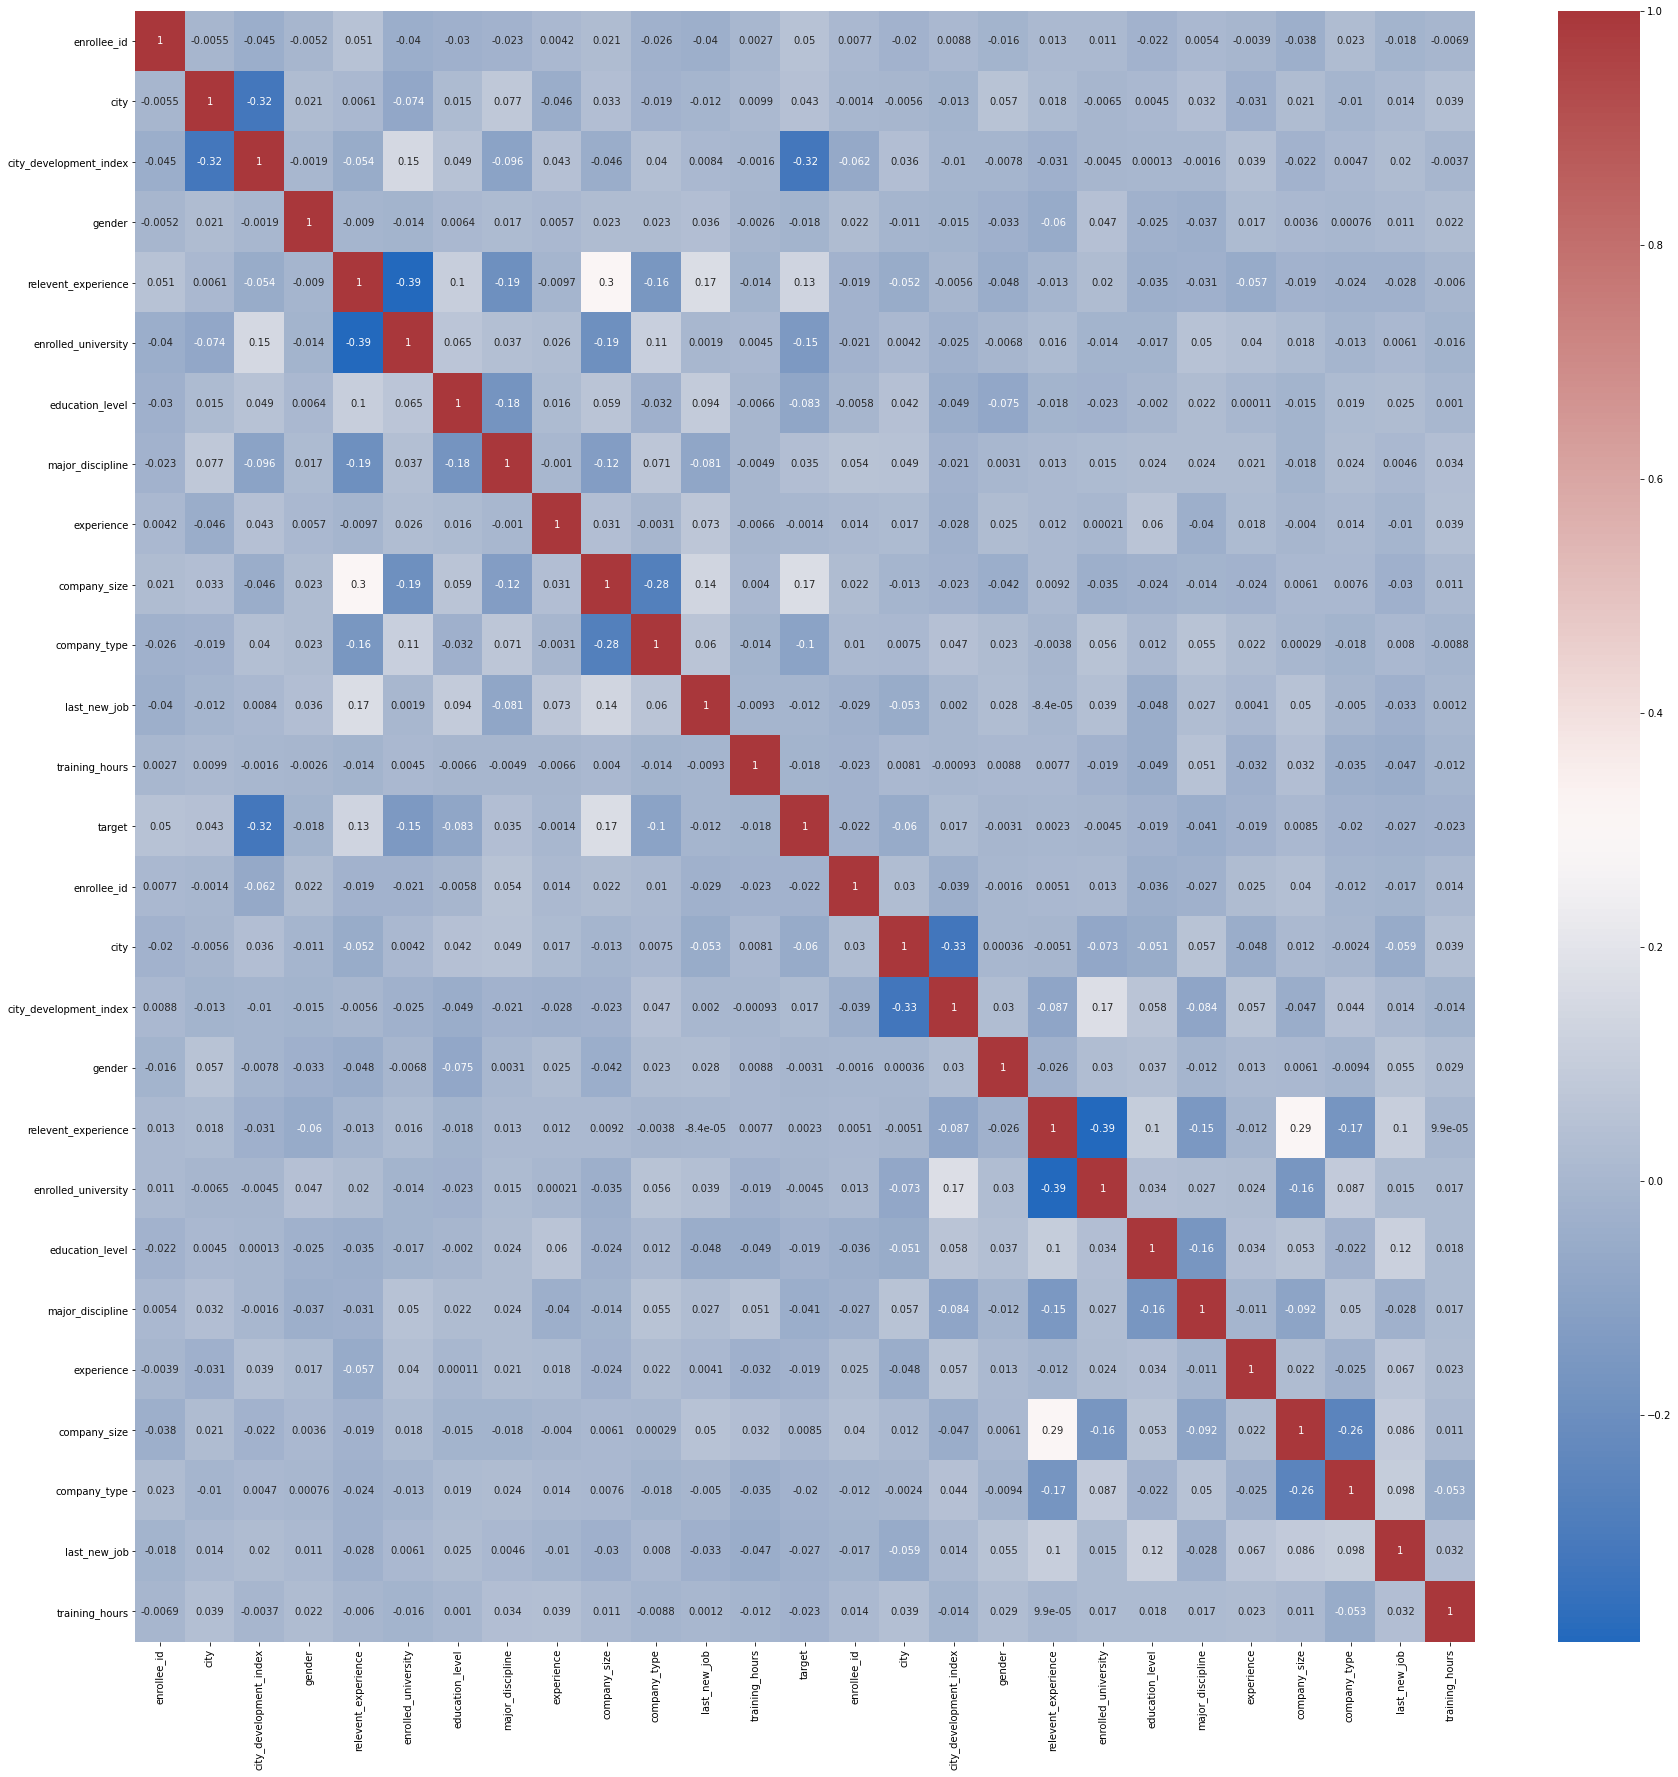

In [14]:
plt.figure(figsize=(30,30))
sns.heatmap(pd.concat([train,test], axis=1).corr(), annot=True, cmap='vlag')

# del

In [15]:
del train['enrollee_id']
del test['enrollee_id']
# New one
target = train.pop('target')

print(train.shape, test.shape)

(14650, 12) (1621, 12)


In [16]:
target

0        1.0
1        0.0
4        0.0
6        0.0
7        1.0
        ... 
19152    0.0
19153    1.0
19154    1.0
19155    0.0
19156    0.0
Name: target, Length: 14650, dtype: float64

# UpSampling

In [17]:
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN, RandomOverSampler, SMOTENC, SVMSMOTE
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.under_sampling import ClusterCentroids, TomekLinks, NearMiss, RandomUnderSampler, AllKNN, CondensedNearestNeighbour,NeighbourhoodCleaningRule, OneSidedSelection, RepeatedEditedNearestNeighbours, InstanceHardnessThreshold

In [18]:
smote = SMOTE()
train, target = smote.fit_resample(train, target)

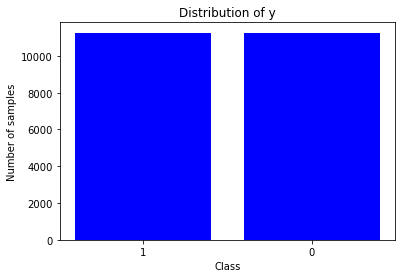

In [19]:
count = Counter(target)
plt.bar(['1', '0'], count.values(), color='blue')
plt.title('Distribution of y')
plt.xlabel('Class')
plt.ylabel('Number of samples')
plt.show()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.2)

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

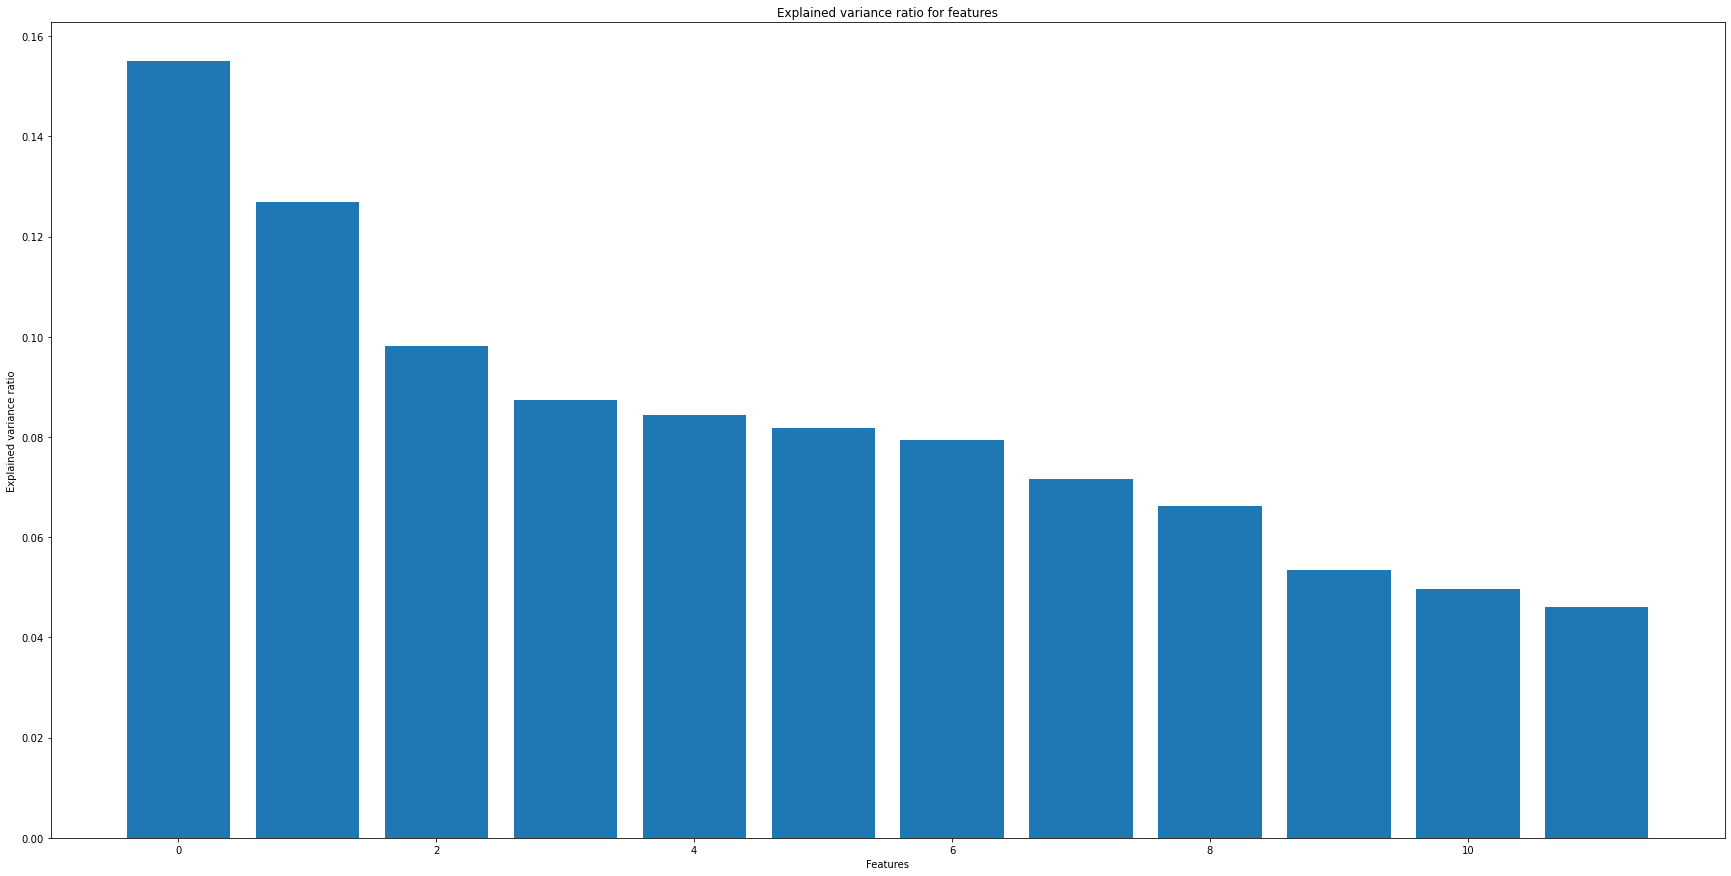

In [22]:
plt.figure(figsize=(30,15))
pca = PCA(n_components=12).fit(X_train)
evr = pca.explained_variance_ratio_
plt.bar(range(len(evr)), evr)
plt.title('Explained variance ratio for features')
plt.xlabel('Features')
plt.ylabel('Explained variance ratio')
plt.show()

In [23]:
pca = PCA(n_components=11)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [24]:
classifiers = [['XGBoost', XGBClassifier()], ['Random Forest', RandomForestClassifier()], 
               ['Linear SVC', LinearSVC(dual=False)], ['SGD', SGDClassifier()]]
scores = []
cross_vals = []
roc_aucs = []

for classifier in classifiers:
    name = classifier[0]
    model = classifier[1]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    score = model.score(X_test, y_test)
    cross_val = cross_val_score(model, X_test, y_test).mean()
    roc_auc = roc_auc_score(y_test, y_pred)
    
    scores.append(score)
    cross_vals.append(cross_val)
    roc_aucs.append(roc_auc)
    
    print(name)
    print('model score:    ', score)
    print('cross val score:', cross_val)
    print('ROC AUC score:  ', roc_auc)
    if classifier != classifiers[-1]:
        print('')

C:\Users\BIS_COM\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:14:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\BIS_COM\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:14:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:14:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:14:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:14:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

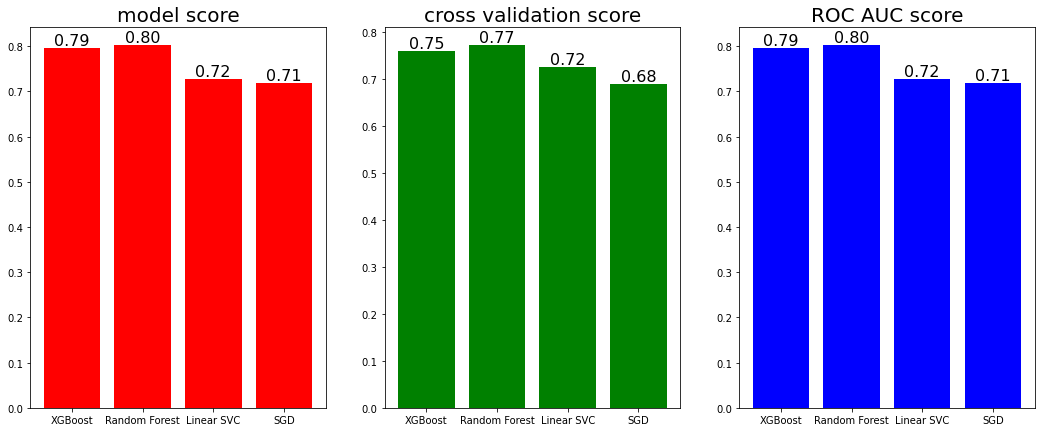

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(18, 7))
metrics = [scores, cross_vals, roc_aucs]
metric_names = ['model score', 'cross validation score', 'ROC AUC score']
names = ['XGBoost', 'Random Forest', 'Linear SVC', 'SGD']
colours = ['red', 'green', 'blue']

for metric in metrics:
    index = metrics.index(metric)
    ax = axes.flatten()[index]
    bars = ax.bar(names, metric, color=colours[index])
    for bar in bars:
        label = str(metric[list(bars).index(bar)])[:4]
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), label, ha='center', 
                va='bottom', fontsize=16)
    ax.set_title(metric_names[index], fontsize=20)
plt.show()

# Predict at Test dataset

In [29]:
features = test.columns.tolist()
features

['city',
 'city_development_index',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job',
 'training_hours']

In [30]:
test

city  city_development_index  gender  relevent_experience  \
0       78                   0.827       1                    0   
1        5                   0.920       0                    0   
2       64                   0.624       1                    1   
3       26                   0.827       1                    0   
4        5                   0.920       1                    0   
...    ...                     ...     ...                  ...   
2124     5                   0.920       1                    1   
2125    30                   0.897       1                    0   
2126     2                   0.887       1                    1   
2127     4                   0.804       1                    0   
2128     4                   0.804       1                    0   

      enrolled_university  education_level  major_discipline  experience  \
0                       0                0                 5          19   
1                       2                0                 5          15   
2                       2                1                 3          20   
3                       2                2                 5           2   
4                       2                0                 5          21   
...                   ...              ...               ...         ...   
2124                    2                0                 2           7   
2125                    2                2                 5           9   
2126                    2                4                 3          13   
2127                    0                1                 3          17   
2128                    2                2                 5           6   

      company_size  company_type  last_new_job  training_hours  
0                7             3             0              21  
1                7             5             0              98  
2                7             5             5              15  
3                0             5             0              39  
4                3             5             4              72  
...            ...           ...           ...             ...  
2124             7             4             3              15  
2125             7             3             1              30  
2126             7             5             5              18  
2127             1             4             0              84  
2128             3             5             1              11  

[1621 rows x 12 columns]

In [33]:
predictions = model.predict(test.values)

predictions

ValueError: X has 12 features per sample; expecting 11

In [31]:
train

city  city_development_index  gender  relevent_experience  \
0         5                0.920000       1                    0   
1        77                0.776000       1                    1   
2        50                0.767000       1                    0   
3        49                0.920000       1                    0   
4        83                0.762000       1                    0   
...     ...                     ...     ...                  ...   
22519    47                0.779293       1                    0   
22520    64                0.624000       1                    0   
22521    49                0.920000       0                    0   
22522     5                0.920000       1                    0   
22523     4                0.826752       1                    0   

       enrolled_university  education_level  major_discipline  experience  \
0                        2                0                 5          21   
1                        2                0                 5           6   
2                        2                2                 5          21   
3                        2                1                 3          15   
4                        2                0                 5           4   
...                    ...              ...               ...         ...   
22519                    2                0                 5          21   
22520                    1                0                 5           0   
22521                    0                0                 2          18   
22522                    2                2                 5          21   
22523                    2                2                 5           3   

       company_size  company_type  last_new_job  training_hours  
0                 7             3             0              36  
1                 4             5             4              47  
2                 4             1             3               8  
3                 4             1             0              24  
4                 7             5             4              18  
...             ...           ...           ...             ...  
22519             7             3             2              26  
22520             3             5             0               9  
22521             7             3             0             104  
22522             7             3             4              46  
22523             3             4             4              26  

[22524 rows x 12 columns]

In [ ]:
submission = pd.DataFrame({'enrollee_id':test['enrollee_id'],'target':predictions})
                        

#Visualize the first 10 rows
submission.head(10)